**The objective of the project is to determine solution for bank domain, by recognizing which customers are at risk of leaving and what are the reasons for exiting using different machine learning models.**

**Overview**

1. Exploratory data analysis
2. Finding non-important features
3. Data pre-processing
4. Balancing the dataset
5. Modeling without hyperparameter tuning
6. Cross Validation
7. Now lets Tune hyper-parameters and optimize models
8. Models Evaluation
9. Accuracy and ROC Summary 
10. Conclusion

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.graphics.mosaicplot import mosaic

In [ ]:
bank_data = pd.read_csv('Bank_Churn_Data.csv')

# Exploratory Data Analysis 

**bank_data is original dataset(before any data manupulations) and below are insight of that**

In [ ]:
bank_data.shape

(10000, 13)

In [ ]:
#first 5 instances using "head()" function
bank_data.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
bank_data.tail()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 1015.8+ KB


In [ ]:
bank_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# Describe categorcial data
from IPython.display import display, HTML
display(HTML(bank_data[bank_data.columns[bank_data.dtypes == 'object']].describe().to_html()))

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [ ]:
bank_data.nunique()

RowNumber          10000
CustomerId         10000
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Summary - 
1. RowNumber(1 - 1000) and CustomerId (bank customer identification) are unique numbers assigned to customers.
2. Credit score of the customer is best represented as integer the range varies from 350 to 850.
3. Geography is the location of country from which the customer belongs, three countries.
4. Gender if a customer is male or female.
5. Age of the customer ranging from 18 - 92 years.
6. Tenure represents the number of years the customer has been with the bank.
7. Balance determines the amount of money available for withdrawal represented as float variable.
8. NumOfProducts is the number of products a customer is using from the bank, there are major 4 products.
9. HasCrCard, whether the customer holds a credit card with the bank or not.
10. IsActiveMember, whether the customer is an active member with the bank or not.
11. EstimatedSalary salary($) of the customers ranging from 11.6 - 200k.
12. Exited is the response variable, 1 if the customer closed account with bank and 0 if the customer is retained.



In [ ]:
bank_data.isna()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
bank_data.isna().sum()

RowNumber          0
CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
bank_data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

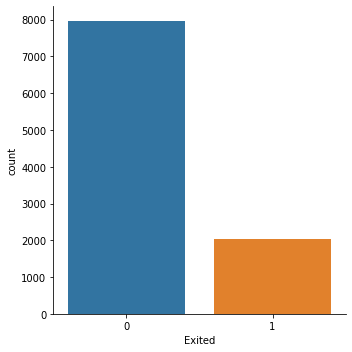

In [ ]:

sns.catplot(x='Exited', data=bank_data, kind='count')

We will be balancing the dataset later during feature engineering.
***For that we need to create a copy of bank_data, so we dont touch original dataset, istead, we will maipulate a new copy of it, which would called "bank_data_copy".***

In [ ]:
bank_data_copy = bank_data.copy()

In [ ]:
gender_categories = {'Male': 0, 'Female': 1}
geography_categories = {'France': 0, 'Spain': 1, 'Germany': 3}

bank_data_copy['Gender'] = bank_data_copy['Gender'].map(gender_categories)
bank_data_copy['Geography'] = bank_data_copy['Geography'].map(geography_categories)


# Finding the non-important features.

In [ ]:
temp_X = bank_data_copy.drop('Exited', axis=1)
temp_y = bank_data_copy['Exited']
temp_X.head()


,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,619,0,1,42,2,0.00,1,1,1,101348.88
1,2,15647311,608,1,1,41,1,83807.86,1,0,1,112542.58
2,3,15619304,502,0,1,42,8,159660.80,3,1,0,113931.57
3,4,15701354,699,0,1,39,1,0.00,2,0,0,93826.63
4,5,15737888,850,1,1,43,2,125510.82,1,1,1,79084.10


In [ ]:
temp_y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
!pip install skfeature-chappers

In [ ]:

from sklearn.feature_selection import mutual_info_classif
from skfeature.function.similarity_based import fisher_score

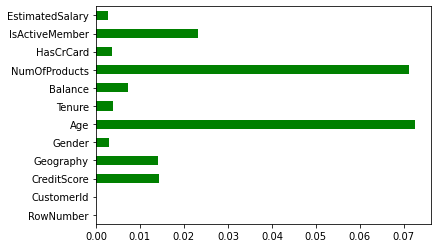

In [ ]:
#importances = fisher_score.fisher_score(X, y)
importances = mutual_info_classif(temp_X, temp_y)
#feature_imp = pd.Series(importances, datafr)
type(importances)

feature_importance = pd.Series(importances, bank_data_copy.columns[0: len(bank_data_copy.columns)-1])
feature_importance.plot(kind='barh', color='green')

What above code tells us that all the columns except curtomeId and RowNumber are gaining some information toward "Exited" column. In other words, all the columns except curtomeId and RowNumber are contributing something toward "Exited" column. 

In [ ]:
cor = bank_data_copy.corr()

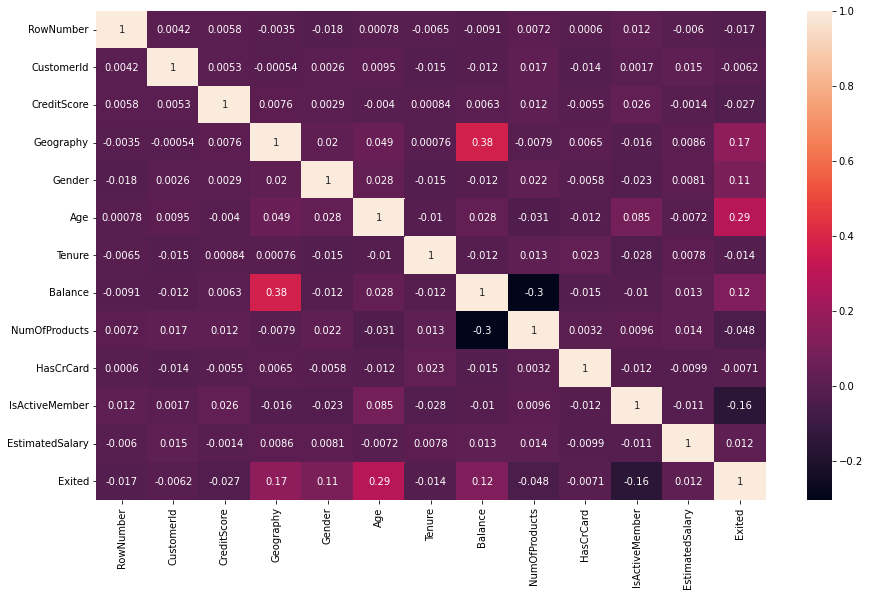

In [ ]:
plt.figure(figsize=(15,9))
sns.heatmap(cor, annot=True)

What above heatmap tells us that only columns Geography, Gender, Age, Balance, and IsActiveMenber are related to "Exited" column but all of them have week correlation. 

In [ ]:
bank_data.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


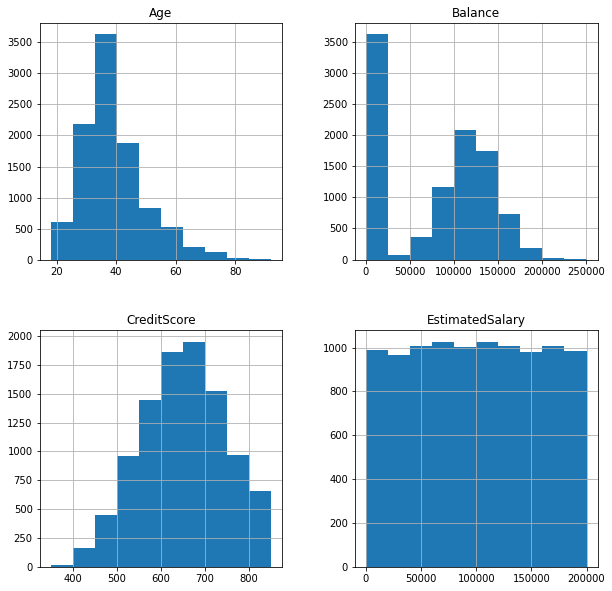

In [ ]:
bank_data.hist(figsize=(10,10), column=["Age", "Balance", "CreditScore", "EstimatedSalary"])
plt.show()

Summary -

* Age is a bit right-skewed.
* Balance is fairly normal distributed.
* It is observed that Credit scores above 600 are higher, there is a possiblity that high quality customers will leave.



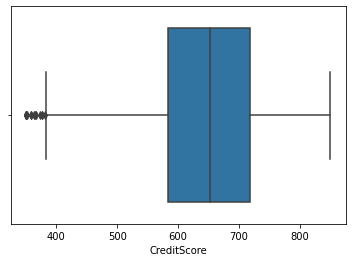

In [ ]:
sns.boxplot(x="CreditScore", data=bank_data)

Text(0, 0.5, 'Frequency')

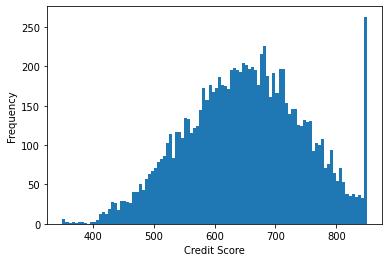

In [ ]:
bank_data['CreditScore'].hist(bins=100, grid=False)
plt.xlabel("Credit Score", fontsize=10)
plt.ylabel("Frequency",fontsize=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


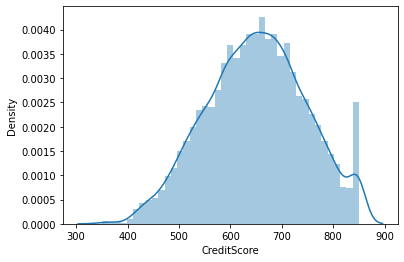

In [ ]:
sns.distplot(bank_data['CreditScore'])

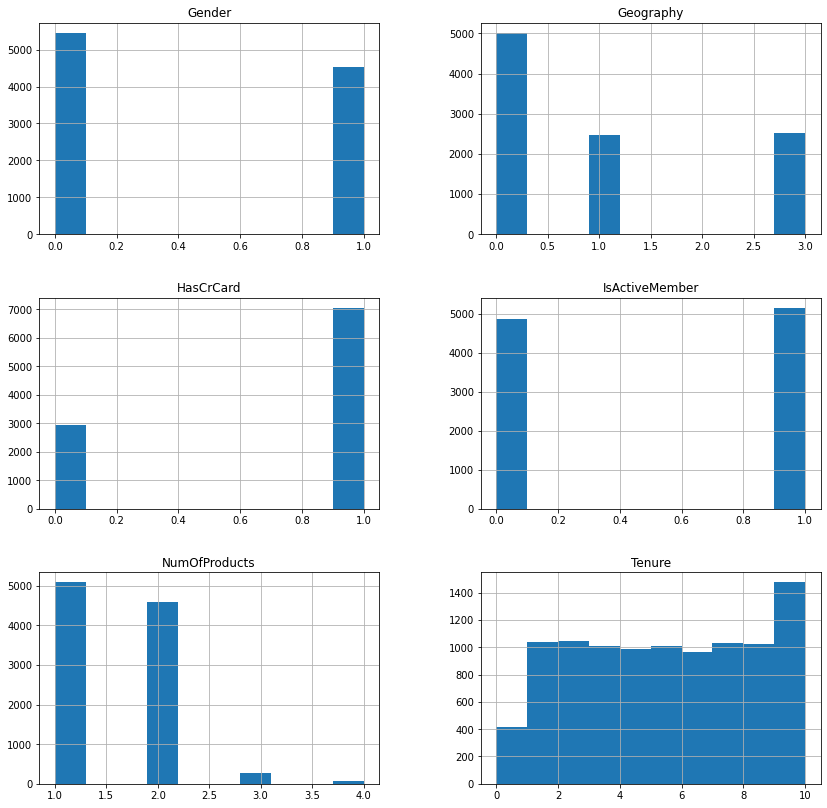

In [ ]:
bank_data_copy.hist(figsize=(14,14), column=["Gender", "Geography", "HasCrCard", "IsActiveMember", "NumOfProducts", "Tenure"])
plt.show()

Summary - 
* We have more male(0) customers than females(1).
* Customers from France (most) (0), Germany(2) and Spain(1).
* Most of the customers have the bank’s credit card.
* We have about equal numbers of active and inactive members, which is not a promising indicator.
* The majority of customers only use one or two types of items, with only a handful using three or four.

#Age

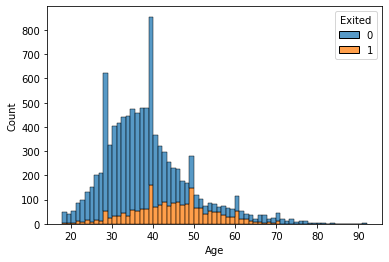

In [ ]:
sns.histplot(data=bank_data, x='Age', hue='Exited', multiple="stack")

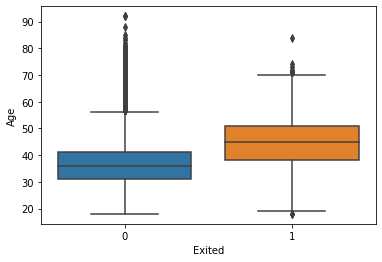

In [ ]:
sns.boxplot(x='Exited', y='Age', data=bank_data)

Summary - 

* The distribution of customers staying is right-skewed (tend to be young). Outliers beyond the age of 60 may be our long-term consumers.
* Customers that have exited are invariably between the ages of 40 and 50. For retirement or a family situation, they may need to move to another banking provider.
* There is a significant difference between these two categories.



#Balance

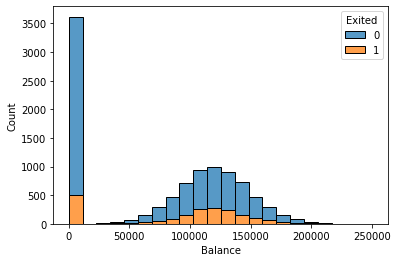

In [ ]:
sns.histplot(data=bank_data, x='Balance', hue='Exited', multiple="stack")

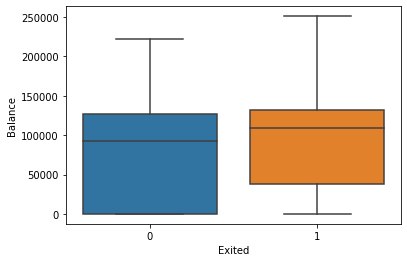

In [ ]:
sns.boxplot(x='Exited', y='Balance', data=bank_data)


Summary -

* The distribution of these two categories is very similar.

* Consumers that stayed had smaller balances than the customers who left the bank, which is noteworthy.

# Credit Score

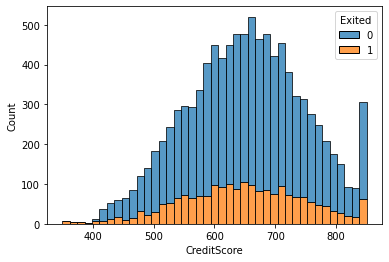

In [ ]:
sns.histplot(data=bank_data, x='CreditScore', hue='Exited', multiple="stack")

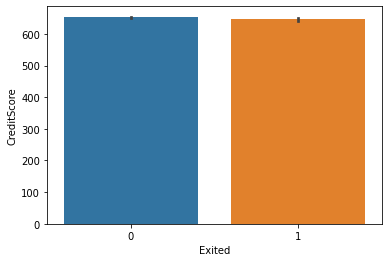

In [ ]:
sns.barplot(x='Exited', y='CreditScore', data=bank_data)

Summary -

* On the whole, the distribution is simmilar.

* Consumers with extremely low credit scores observed on the left tail as well as those with extremely high credit scores left, indicating that both extremely low and highly high quality customers are more readily leaving than ordinary customers.

# Estimated Salary

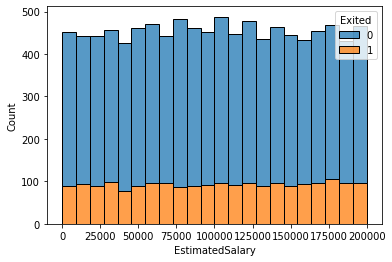

In [ ]:
sns.histplot(data=bank_data, x='EstimatedSalary', hue='Exited', multiple="stack")

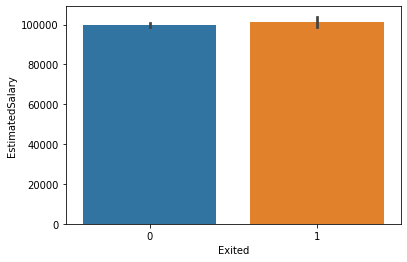

In [ ]:
sns.barplot(x='Exited', y='EstimatedSalary', data=bank_data)

Summary -
* The distributions of both groups are extremely similar. 

* Estimated Salary may or may not be critical information in determining whether or not a customer would leave the bank.

# Gender

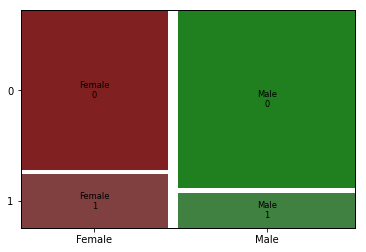

In [ ]:
mosaic(data=bank_data, index=['Gender', 'Exited'], gap=0.03)
plt.show()

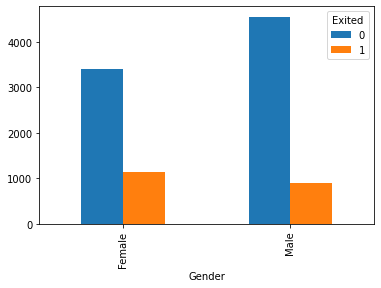

In [ ]:
pd.crosstab(bank_data.Gender,bank_data.Exited).plot(kind='bar')

* From above bar plot it can be observed that female clients have higher frequency of exiting the bank than their male counterparts

# Geography

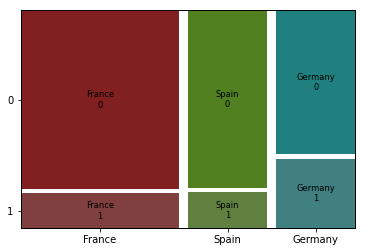

In [ ]:
mosaic(data=bank_data, index=['Geography', 'Exited'], gap = 0.03)
plt.show()

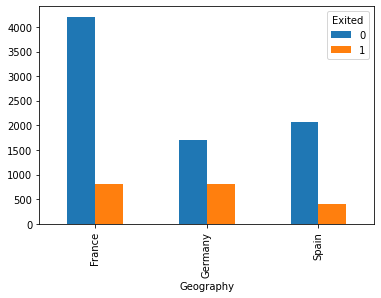

In [ ]:
pd.crosstab(bank_data.Geography,bank_data.Exited).plot(kind='bar')

From above bar plot it can be observed that French clients have lowest frequency of exiting the bank, after that Spanish clients and lastly German Clients have the highest frequency of exiting the bank

In [ ]:
bank_data[['Geography','Gender','Exited']].groupby(['Geography','Gender']).agg(['mean','count'])

Exited      
                      mean count
Geography Gender                
France    Female  0.203450  2261
          Male    0.127134  2753
Germany   Female  0.375524  1193
          Male    0.278116  1316
Spain     Female  0.212121  1089
          Male    0.131124  1388

* Females are more probable than males to leave the bank.

* Customers in Germany are more inclined than those in France and Spain to leave the bank.

# Has Credit Card

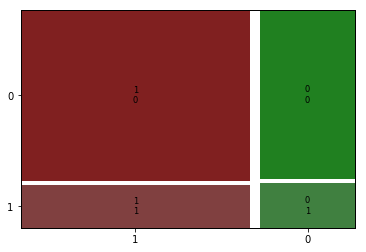

In [ ]:
mosaic(data=bank_data, index=['HasCrCard', 'Exited'], gap = 0.03)
plt.show()

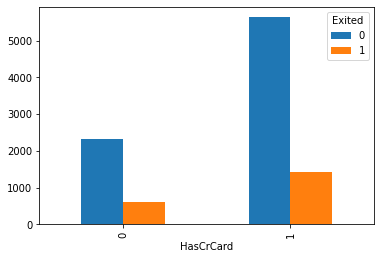

In [ ]:
pd.crosstab(bank_data.HasCrCard,bank_data.Exited).plot(kind='bar')

* From above plots, it can be observed that clients with credit cards have higher frequency of exiting the bank than their non credit card holder counterparts


# Is Active Member

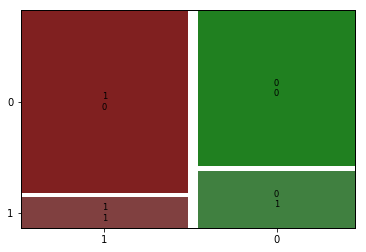

In [ ]:
mosaic(data=bank_data, index=['IsActiveMember', 'Exited'], gap = 0.03)
plt.show()

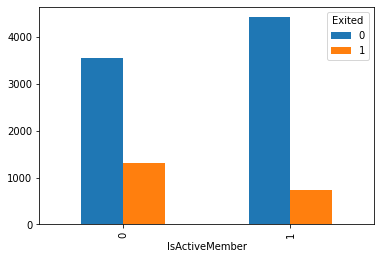

In [ ]:
pd.crosstab(bank_data.IsActiveMember,bank_data.Exited).plot(kind='bar')

* Churn is more prevalent among inactive consumers than among active customers (very reasonable variable)
* From above bar plot it can be observed that clients who are active members have lower frequency of exiting the bank than their inactive member counterparts

# Number of Products

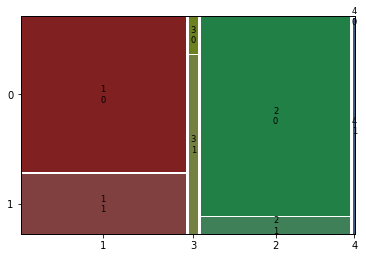

In [ ]:
mosaic(data=bank_data, index=['NumOfProducts', 'Exited'], gap = 0.01)
plt.show()

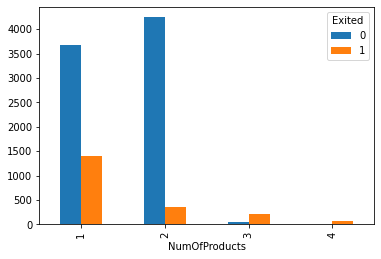

In [ ]:
pd.crosstab(bank_data.NumOfProducts,bank_data.Exited).plot(kind='bar')

* Customers who utilise three or four products are far less likely to leave.

# Tenure

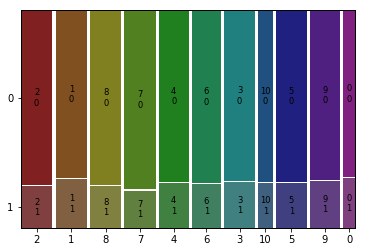

In [ ]:
mosaic(data=bank_data, index=['Tenure', 'Exited'], gap = 0.01)
plt.show()

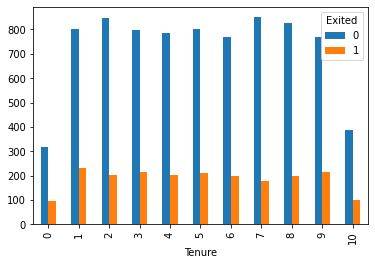

In [ ]:
pd.crosstab(bank_data.Tenure,bank_data.Exited).plot(kind='bar')

* From above bar plot it is difficult to infer any correlation betweeen the variables
* Customers in various tenure categories do not appear to have a tendency to churn or stay.

# Data Preprocessing

In [ ]:
bank_data_copy2 = bank_data.drop(labels=['RowNumber', 'CustomerId'], axis=1)

Need to drop 'RowNumber' and 'CustomerId' from daraframe becuase it does not make sense to use them for any interpretation and model creation. 

In [ ]:
bank_data_copy2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#One Hot encoding
bank_data_copy2 = pd.get_dummies(bank_data_copy2, columns=['Geography', 'Gender'], drop_first=False)

We will be using get_dummies feature from pandas to encode our cetogorical variables to numerical, so it can be efficiently used for model building.

In [ ]:
bank_data_copy2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [ ]:
y = bank_data_copy2['Exited']

In [ ]:
# StandardScaler

cat_df = bank_data_copy2[["Exited","Geography_Germany", "Geography_France","Geography_Spain", "Gender_Male","Gender_Female" ,"HasCrCard","IsActiveMember"]]

X_StandardScaler = bank_data_copy2.drop(labels=["Exited","Geography_Germany", "Geography_France","Geography_Spain", "Gender_Male","Gender_Female" ,"HasCrCard","IsActiveMember"],axis=1)

from sklearn.preprocessing import StandardScaler
transformer_StandardScaler = StandardScaler().fit(X_StandardScaler)
X_StandardScaler = transformer_StandardScaler.transform(X_StandardScaler)

**We need to scale continuous variables, so it can create consistency between all the varaiables in dataset. We are using StandardScaler from sklearn to do that scaling job. **
**We need to standrdize the data, so we have negative values for standard deviations and mean analysis. It helps us normalize the data. **

In [ ]:
X_StandardScaler.shape

(10000, 6)

In [ ]:
# Create the dataframe
df_for_model = pd.DataFrame(X_StandardScaler, columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])

**Need to convert numpy array into dataframe we can use it for balancing the data. **

In [ ]:
df_for_model.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276


In [ ]:
df_for_model_merged = pd.concat([df_for_model, cat_df], axis=1)

Combining continuous scaled dataframe and categorical dataframe together, so it help us during balancing the data.

In [ ]:
df_for_model_merged.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_Germany,Geography_France,Geography_Spain,Gender_Male,Gender_Female,HasCrCard,IsActiveMember
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,1,0,1,0,0,1,1,1
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,0,0,0,1,0,1,0,1
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,1,0,1,0,0,1,1,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,0,0,1,0,0,1,0,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,0,0,0,1,0,1,1,1


In [ ]:
df_for_model_merged.drop(['HasCrCard', 'IsActiveMember'], axis=1, inplace=True)

In [ ]:
df_for_model_merged.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_Germany,Geography_France,Geography_Spain,Gender_Male,Gender_Female
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,1,0,1,0,0,1
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,0,0,0,1,0,1
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,1,0,1,0,0,1
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,0,0,1,0,0,1
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,0,0,0,1,0,1


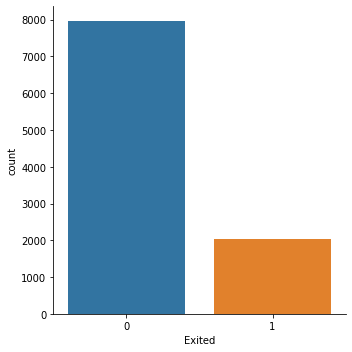

In [ ]:
sns.catplot(x='Exited', data=df_for_model_merged, kind='count')

In [ ]:
X_StandardScaler = df_for_model_merged.drop('Exited', axis=1)


Separating the independent variables.

In [ ]:
X_StandardScaler

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_France,Geography_Spain,Gender_Male,Gender_Female
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,0,1,0,0,1
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,0,0,1,0,1
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,0,1,0,0,1
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,0,1,0,0,1
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,-0.066419,0,1,0,1,0
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.027988,0,1,0,1,0
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.008643,0,1,0,0,1
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,-0.125231,1,0,0,1,0


In [ ]:
X_StandardScaler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Age                10000 non-null  float64
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  float64
 5   EstimatedSalary    10000 non-null  float64
 6   Geography_Germany  10000 non-null  uint8  
 7   Geography_France   10000 non-null  uint8  
 8   Geography_Spain    10000 non-null  uint8  
 9   Gender_Male        10000 non-null  uint8  
 10  Gender_Female      10000 non-null  uint8  
dtypes: float64(6), uint8(5)
memory usage: 517.7 KB


# Balancing the dataset

* Our dataset includes 10,000 customers with 13 different attributes ranging from demographics to location to  the transactional information. 

* We started by removing two columns: RowNumber, and CustomerId,  which aren't relevant to the analysis.

* We have unbalanced data, which means there are an uneven amount of class labels. 

* The resample module is used to increase sample the minority class in order to make the class labels proportional.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=0)
rus = RandomUnderSampler(random_state=0)

X_resampled_ros, y_resampled_ros = ros.fit_resample(X_StandardScaler, y)

X_resampled_rus, y_resampled_rus = rus.fit_resample(X_StandardScaler, y)


**We need to balance dataset becuase unbalance dataset creates sensitivity problems in our confusion matrix. **

In [ ]:
X_resampled_ros.shape


(15926, 11)

In [ ]:
y_resampled_ros.shape

(15926,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


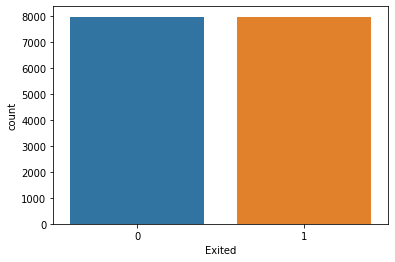

In [ ]:
sns.countplot(y_resampled_ros)

In [ ]:
# Need to drop 'RowNumber' and 'CustomerId' column from X_resampled and y_resampled

#X_resampled
# X_resampled.drop(['RowNumber','CustomerId'], axis=1, inplace=True)
# X_resampled.head()

In [ ]:

# Train-Test Separation
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X_resampled_ros, y_resampled_ros, test_size=0.20, random_state=42)

In [ ]:
# Spliting data
#from sklearn.model_selection import train_test_split, cross_val_score
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Build Models ==========================================================

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

**Model without any hyperparameter tuning.**

In [ ]:
log_temp_mod = LogisticRegression(random_state=42)
log_temp_mod.fit(X_train, y_train)
y_pred_logreg_temp = log_temp_mod.predict(X_test)

randFor_temp_mod = RandomForestClassifier(random_state=42)
randFor_temp_mod.fit(X_train, y_train)
y_pred_randFor_temp = randFor_temp_mod.predict(X_test)

svm_temp_mod = SVC(gamma='auto', random_state=42)
svm_temp_mod.fit(X_train, y_train)
y_pred_svm_temp = svm_temp_mod.predict(X_test)

**We are building above models, just to check the initial accuracy performance of the models without any hyper-perameter tunning. **

In [ ]:
print("Logistic Regression Score: ", accuracy_score(y_test, y_pred_logreg_temp))
print("Random Forest Score: ", accuracy_score(y_test, y_pred_randFor_temp))
print("SVM Score: ", accuracy_score(y_test, y_pred_svm_temp))



Logistic Regression Score:  0.6917765222849969
Random Forest Score:  0.940677966101695
SVM Score:  0.7777777777777778


In [ ]:
#svm_temp_mod.intercept_


We can see above that **Random Forest have better accuracy** than Logistic Regression and Support vector Machine model, withput even any parameters tunning. 

**Cross Validation**

* If you randomly select a part of data as train and another part as test, you 
may have high accuracy for the train part, but have lower accuracy for the test part. Methods like n-fold cross validation and others will help you find the best fit model based on your data. They will help you find the model with the lowest errors on all parts of the data.

* Cross-validation using K-folds is a popular technique, whereby, for example, k=10 is divided into 9 folds for training and one fold for testing, and this process repeats until all folds are tested one by one. By doing so, we can get an indication of the generalization ability of the model, especially if we only have a limited amount of data and are not able to split it into test and training.

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

In [ ]:
# Cross validate model with Kfold stratified cross validation
kfold = StratifiedKFold(n_splits=5)

In [ ]:
log_classifier = LogisticRegression()
rf_classifier = RandomForestClassifier()
svm_classifier = SVC()

In [ ]:
log_cv_result = cross_val_score(log_classifier, X_train, y = y_train, scoring = 'accuracy', cv = kfold, n_jobs=4)
rf_cv_result = cross_val_score(rf_classifier, X_train, y = y_train, scoring = 'accuracy', cv = kfold, n_jobs=4)
svm_cv_result = cross_val_score(svm_classifier, X_train, y = y_train, scoring = 'accuracy', cv = kfold, n_jobs=4)

In [ ]:
cross_val_means = []
cross_val_std = []

cross_val_means.append(log_cv_result.mean())
cross_val_means.append(rf_cv_result.mean())
cross_val_means.append(svm_cv_result.mean())

cross_val_std.append(log_cv_result.std())
cross_val_std.append(rf_cv_result.std())
cross_val_std.append(svm_cv_result.std())

In [ ]:
cv_allResults = pd.DataFrame({'Algorithm':['Logistic Regression', 'Random Forest', "SVC"],
                              'CV_Means': cross_val_means,'CV_stds/errors': cross_val_std})

In [ ]:
cv_allResults

,Algorithm,CV_Means,CV_stds/errors
0,Logistic Regression,0.701491,0.002452
1,Random Forest,0.926609,0.002342
2,SVC,0.785636,0.005412


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


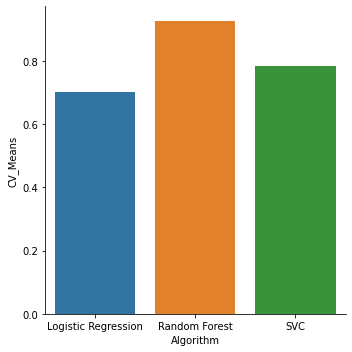

In [ ]:
sns.catplot('Algorithm','CV_Means', data=cv_allResults, kind='bar')

It is shown that Random Forest seems to have higher accuracy mean as compare to other two models. It is leading in the performance like it did on initial modeling.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


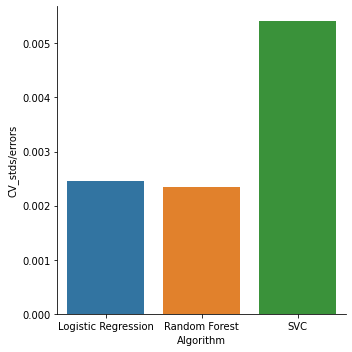

In [ ]:
sns.catplot('Algorithm','CV_stds/errors', data=cv_allResults, kind='bar')

It is noticable in the barplot that Random Forest have lower errors than SVM but higher than Logistic Regression. I think difference between Random Forest and Logistic Regression is not too much but accurancy of Random Forest is much higher than Logistic Regression. 

# Now lets Tune hyper-parameters and optimize models

**Logistic regression**

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler


Below, we need to create pipeline to connect various steps for hyper-parameters tunning.

In [ ]:
# Creating steps to pass on pipeline
steps_logreg= [('scaler', StandardScaler()), ('logistic', LogisticRegression(max_iter=10000))]

In [ ]:
# Creating pipeline
pipeline_logreg = Pipeline(steps_logreg)

In [ ]:
# Create the parameters for hyperparameteΩr grid
parameters_logreg = {'logistic__C': np.logspace(-5, 8, 15)}

In [ ]:
# Creating hyperparameter grid
cv_search_logreg = GridSearchCV(pipeline_logreg, param_grid=parameters_logreg, cv=5)

It selects from loop which has predefined hyperparameters and fits our Logistic Rigression model on our training set. It helps us to select the best parameters from the listed hyperparameters.

In [ ]:
# train the data
cv_search_logreg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'logistic__C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [ ]:
y_pred_logreg = cv_search_logreg.predict(X_test)

In [ ]:

best_hyperparameters = cv_search_logreg.best_params_
print('Best hyperparameter: \n',best_hyperparameters)

Best hyperparameter: 
 {'logistic__C': 0.05179474679231213}


We can use these hyper-parameters to build a better Logistic Regression model for us. 

In [ ]:
best_model = cv_search_logreg.best_estimator_
print('Best Model: \n', best_model)

Best Model: 
 Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.05179474679231213, max_iter=10000))])


In [ ]:
best_score = cv_search_logreg.best_score_
print('Best Score: \n', best_score)

Best Score: 
 0.7017268445839874


The best score we can achive with suggested hyper-parameters, is **~70.17 %**

In [ ]:
# Here we build our model based on hyper-parameters suggested after tunning

logr_model = LogisticRegression(C=0.05179474679231213, max_iter=10000)


logr_model.fit(X_train, y_train)

LogisticRegression(C=0.05179474679231213, max_iter=10000)

In [ ]:
y_pred_logreg1 = logr_model.predict(X_test)

**Random Forest Classifier**

**Hyper-parameter tuning **

In [ ]:
rfc = RandomForestClassifier(max_features='auto', oob_score=True, random_state=111, n_jobs=-1)

In [ ]:
params_grid =  { 'criterion' : ['gini', 'entropy'],
                'min_samples_leaf' : [1, 3, 6],
                'min_samples_split' : [2, 4, 7],
                'max_depth': [6],
                'bootstrap': [True],
                'max_features': ['auto','sqrt'],
                'n_estimators': [50, 100]
               }
gd_search = GridSearchCV(estimator=rfc, param_grid=params_grid, scoring='accuracy', cv=5, n_jobs=-1)

It selects from loop which has predefined hyperparameters and fits our Random Forest model on our training set. It helps us to select the best parameters from the listed hyperparameters.

In [ ]:
# Takes about 4 mins in my Macbook to train the machine (Sepc: 16GB RAM, intel i7).
gd_search = gd_search.fit(X_train.values, y_train.values)

In [ ]:
# Best hyperparameter from GridSearch
best_hyperparameters = gd_search.best_params_
print('Best hyperparameter: \n',best_hyperparameters)

Best hyperparameter: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


We can use these hyper-parameters to build a better Random Forest model for us. We can see result from above, gini as the best criterion according to the Grid Search, n as 100 trees, min_samples_leaf as 1, samples_spilt as 2, max features kept in auto and max_depth is 6.

In [ ]:
best_model = gd_search.best_estimator_
print('Best Model: \n', best_model)

Best Model: 
 RandomForestClassifier(max_depth=6, n_jobs=-1, oob_score=True, random_state=111)


In [ ]:
best_score = gd_search.best_score_
print('Best Score: \n', best_score)

Best Score: 
 0.7799843014128729


Surprisingly, the best score we can achive with suggested hyper-parameters, is **~77.99%**, may be tunning of hyper-parameters have shown us the real accuracy of instead of some unreal accuracy if we do not tunne the hyper-parameters.

In [ ]:
# Here we build our model based on hyper-parameters suggested after tunning
ran_for_cla = RandomForestClassifier(criterion='gini',
                                     min_samples_split=2,
                                     min_samples_leaf=1,
                                     n_estimators= 100,
                                     max_features= 'auto',
                                     random_state=111,
                                     max_depth=6,
                                     bootstrap=True,
                                     oob_score=True,
                                     n_jobs=-1
                                    )

ran_for_cla.fit(X_train.values, y_train.values)


RandomForestClassifier(max_depth=6, n_jobs=-1, oob_score=True, random_state=111)

In [ ]:
ran_for_cla_pred = ran_for_cla.predict(X_test.values)

**SVM - Support Vector Machine**

In [ ]:
# Creating steps to pass on pipeline
steps_svm = [('scaler', StandardScaler()), ('SVM', SVC())]

In [ ]:
# Creating pipeline
pipeline_svm = Pipeline(steps_svm)

In [ ]:
# Create the parameters for hyperparameter grid
parameters_svm = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01],
              }

In [ ]:
# Creating hyperparameter grid
cv_search_svm = GridSearchCV(pipeline_svm, param_grid=parameters_svm, cv=5)

It selects from loop which has predefined hyperparameters and fits our Support Vector Machine model on our training set. It helps us to select the best parameters from the listed hyperparameters.

In [ ]:
cv_search_svm.fit(X_train.values, y_train.values)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVM', SVC())]),
             param_grid={'SVM__C': [1, 10, 100], 'SVM__gamma': [0.1, 0.01]})

In [ ]:
y_pred_svm = cv_search_svm.predict(X_test.values)

In [ ]:
# Best hyperparameter from GridSearch
best_hyperparameters = cv_search_svm.best_params_
print('Best hyperparameter: \n',best_hyperparameters)



Best hyperparameter: 
 {'SVM__C': 100, 'SVM__gamma': 0.1}


We can use these hyper-parameters to build a better Support Vector Machine model for us. We can see result from above, 0.1 is the best gamma value according to the Grid Search and C being the 100. 

In [ ]:
best_model = cv_search_svm.best_estimator_
print('Best Model: \n', best_model)

Best Model: 
 Pipeline(steps=[('scaler', StandardScaler()), ('SVM', SVC(C=100, gamma=0.1))])


In [ ]:
best_score = cv_search_svm.best_score_
print('Best Score: \n', best_score)

Best Score: 
 0.8161695447409733


The best score we can achive with suggested hyper-parameters, is **~81.62 %**

In [ ]:
# Here we build our model based on hyper-parameters suggested after tunning
svc_model = SVC(C=100, gamma=0.1, probability=True)
svc_model.fit(X_train, y_train)

SVC(C=100, gamma=0.1, probability=True)

In [ ]:
y_pred_svm1 = svc_model.predict(X_test)

# Models Evaluation

**Logistic Regression--------------------------------**

Logistic Regression-------------------------------------------------------------------------------------------
accuracy_score:  0.6905210295040803
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1633
           1       0.69      0.68      0.68      1553

    accuracy                           0.69      3186
   macro avg       0.69      0.69      0.69      3186
weighted avg       0.69      0.69      0.69      3186

Tuned Model Best Parameters: {'logistic__C': 0.05179474679231213}
Tuned Model Best Score: 0.7017268445839874
[[1151  482]
 [ 504 1049]]


Text(69.0, 0.5, 'Truth')

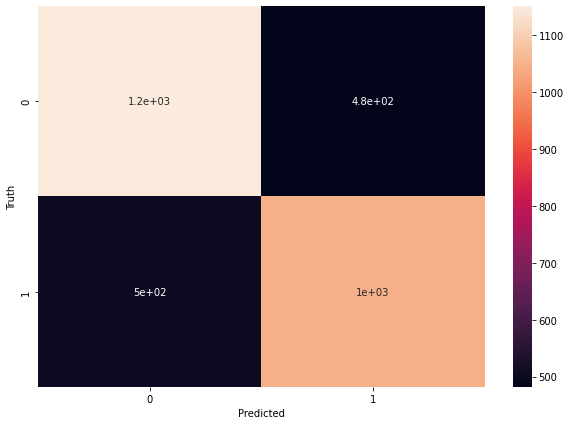

In [ ]:



# Compute and print metrics
print("Logistic Regression-------------------------------------------------------------------------------------------")

print("accuracy_score: ", accuracy_score(y_test, y_pred_logreg1))
print(classification_report(y_test, y_pred_logreg1))
print("Tuned Model Best Parameters: {}".format(cv_search_logreg.best_params_))
print("Tuned Model Best Score: {}".format(cv_search_logreg.best_score_))


# Confusion matrix for SVM
cm_lr = confusion_matrix(y_test, y_pred_logreg1)
print(cm_lr)
plt.figure(figsize=(10,7))
sn.heatmap(cm_lr, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')





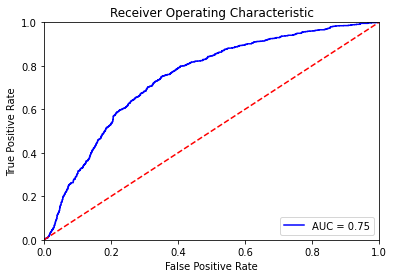

In [ ]:
# Import necessary modules
from sklearn import metrics
# Compute predicted probabilities: y_pred_prob
y_pred_prob_lr = logr_model.predict_proba(X_test)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)


roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)
 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


**Random Forest Classifier------------------------------**

Random Forest Classifier-------------------------------------------------------------------------------------------
accuracy_score:  0.7671060891399875
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1633
           1       0.76      0.76      0.76      1553

    accuracy                           0.77      3186
   macro avg       0.77      0.77      0.77      3186
weighted avg       0.77      0.77      0.77      3186

OOB score: 
 0.7754317111459968
[0.02374817 0.44447909 0.00886563 0.07062061 0.30624895 0.01902306
 0.07143379 0.01284272 0.00561586 0.0180177  0.01910442]


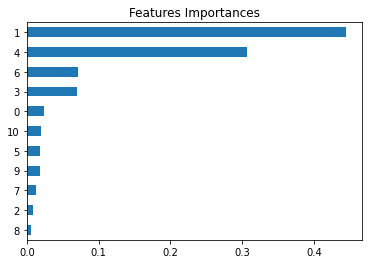

[[1263  370]
 [ 372 1181]]


Text(69.0, 0.5, 'Truth')

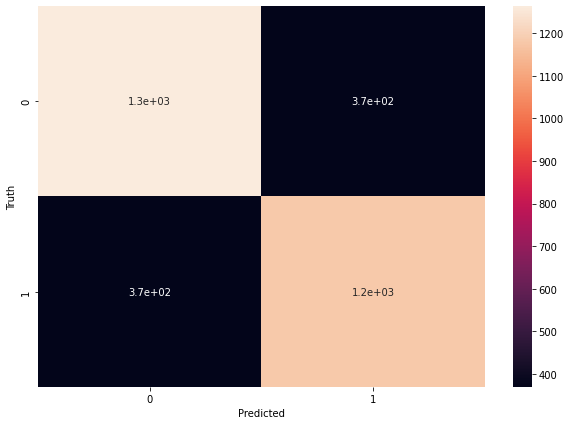

In [ ]:


# Compute and print metrics
print("Random Forest Classifier-------------------------------------------------------------------------------------------")

print("accuracy_score: ", accuracy_score(y_test, ran_for_cla_pred))
print(classification_report(y_test, ran_for_cla_pred))

oob_score = ran_for_cla.oob_score_
print("OOB score: \n", oob_score)

important_features = ran_for_cla.feature_importances_
print(important_features)


# Create a pd.Series of features importances
importances = pd.Series(data=important_features,
                        )

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot.barh()
plt.title('Features Importances')
plt.show()

#We can See above that important variable are soreted in order.



# Confusion matrix for SVM
cm_rfc = confusion_matrix(y_test, ran_for_cla_pred)
print(cm_rfc)
plt.figure(figsize=(10,7))
sn.heatmap(cm_rfc, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


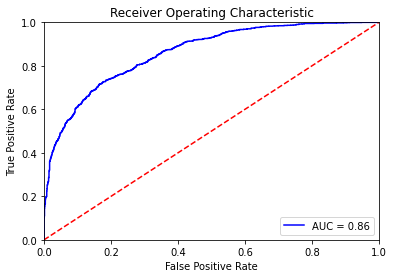

In [ ]:

# from sklearn.metrics import roc_curve
# Compute predicted probabilities: y_pred_prob
y_pred_prob_rfc = ran_for_cla.predict_proba(X_test)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_pred_prob_rfc)

roc_auc_rfc = metrics.auc(fpr_rfc, tpr_rfc)
 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_rfc, tpr_rfc, 'b', label = 'AUC = %0.2f' % roc_auc_rfc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


**SVM---------------------------**

SVM-------------------------------------------------------------------------------------------
accuracy_score:  0.8160703075957313
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1633
           1       0.79      0.84      0.82      1553

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.82      0.82      0.82      3186

Tuned Model Best Parameters: {'SVM__C': 100, 'SVM__gamma': 0.1}
Tuned Model Best Score: 0.8161695447409733
[[1288  345]
 [ 241 1312]]


Text(69.0, 0.5, 'Truth')

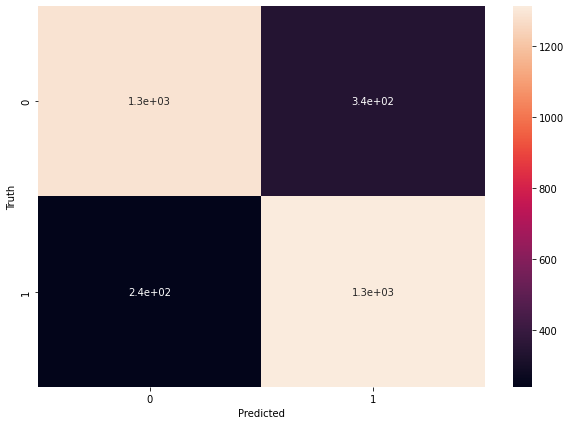

In [ ]:


# Compute and print metrics
print("SVM-------------------------------------------------------------------------------------------")

print("accuracy_score: ", accuracy_score(y_test, y_pred_svm1))
print(classification_report(y_test, y_pred_svm1))
print("Tuned Model Best Parameters: {}".format(cv_search_svm.best_params_))
print("Tuned Model Best Score: {}".format(cv_search_svm.best_score_))
# svm_ImpFeat = pd.Series(abs(svc_model.coef_[0]), index=features.columns)
# svm_ImpFeat.nlargest(10).plot(kind='barh')


# Confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm1)
print(cm_svm)
plt.figure(figsize=(10,7))
sn.heatmap(cm_svm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

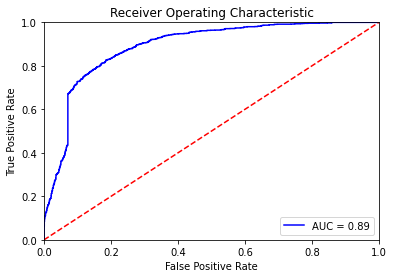

In [ ]:

# from sklearn.metrics import roc_curve
# Compute predicted probabilities: y_pred_prob
y_pred_prob_svm = svc_model.predict_proba(X_test)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)

roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_svm, tpr_svm, 'b', label = 'AUC = %0.2f' % roc_auc_svm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
print('LR: ',cm_lr)
print('Random Forest: ', cm_rfc)
print('SVM: ', cm_svm)

LR:  [[1151  482]
 [ 504 1049]]
Random Forest:  [[1263  370]
 [ 372 1181]]
SVM:  [[1288  345]
 [ 241 1312]]


**The True Positives (TPs)** are those values that were correctly predicted. They are values where both the class value and the predicted class value are positive. 


**Negative Values (TN)**:These are values that have been correctly predicted as negative.


**False Positives (FP)** — When actual class is no and predicted class is yes.

**False Negatives (FN)** — When actual class is yes but predicted class in no.


*SVM seems to have better True-Positvive and True-Negative rate compared to Logistic regression and Random Forest model. SVM also have lower False-positive and False-Negative as compared to other models.*

# Accuracy and ROC Summary

In [ ]:
print("accuracy_score: ", accuracy_score(y_test, y_pred_logreg1))
print("accuracy_score: ", accuracy_score(y_test, ran_for_cla_pred))
print("accuracy_score: ", accuracy_score(y_test, y_pred_svm1))

accuracy_score:  0.6905210295040803
accuracy_score:  0.7671060891399875
accuracy_score:  0.8160703075957313


* After the anlysis of bank data using three models (Logistic, Random Forest, SVM), we found that SVM has the best accuracy and it will able predict the churn rate with accuracy of ~81.60%.


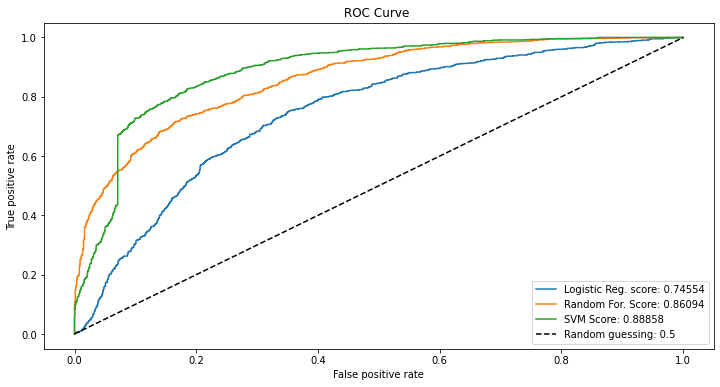

In [ ]:

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_pred_prob_rfc)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm) 

# Plot the roc curve
plt.figure(figsize = (12,6), linewidth= 1)

plt.plot(fpr_lr, tpr_lr, label = 'Logistic Reg. score: ' + str(round(roc_auc_lr, 5)))
plt.plot(fpr_rfc, tpr_rfc, label = 'Random For. Score: ' + str(round(roc_auc_rfc, 5)))
plt.plot(fpr_svm, tpr_svm, label = 'SVM Score: ' + str(round(roc_auc_svm, 5)))




plt.plot([0,1], [0,1], 'k--', label = 'Random guessing: 0.5') 
plt.xlabel('False positive rate') 
plt.ylabel('True positive rate') 
plt.title('ROC Curve ') 
plt.legend(loc='best') 
plt.show()



* ROC - how the model performs
compared to a random guess which is like a linear straight line

* AUC score validates that the model is actually learning as compared to random guesses.

The area under the ROC curve (AUC) results were considered excellent for AUC values between 0.9-1, good for AUC values between 0.8-0.9, fair for AUC values between 0.7-0.8, poor for AUC values between 0.6-0.7 and failed for AUC values between 0.5-0.6.



Initially, Random Forest Model was performing better but as we tunned all the models, we found out that SVM perform better.  

# Conclusion

Follwing are the most important reasons of customers churning from the bank-
* We found that customer with "Age" and "Number of Product" variable player very imporatant role finding the reasons for people to churn.
* Customers in Germany are more inclined than those in France and Spain to leave the bank. 
* Consumers that stayed had smaller balances than the customers who left the bank, which is noteworthy.
* People with credit card (HasCrCard) left the bank.

In conclusion, SVM model can predict this with around 81% accuracy and better ROC with AUC of 0.88. 